## Importing Necessary Libraries

In [1]:
# Preprocessing and Visualizing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

## Importing Dataset

In [2]:
df = pd.read_csv("bodyfat.csv")

#### Taking a glance at the data

In [3]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


#### Checking For missing values

In [4]:
df.isnull().sum().sum()

0

#### Finding the number of Rows and Columns

In [5]:
df.shape

(252, 15)

## Exploratory Data Analysis

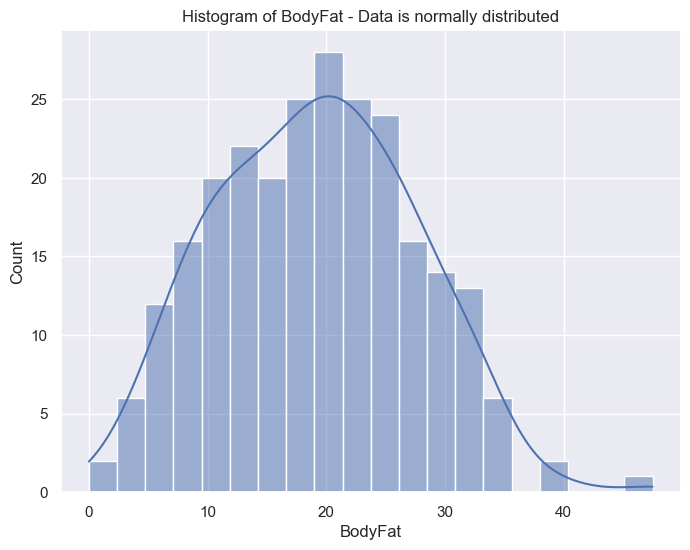

In [19]:
sns.set(style="darkgrid")

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='BodyFat', bins=20, kde=True)

plt.title('Histogram of BodyFat - Data is normally distributed')
plt.xlabel('BodyFat')
plt.show()

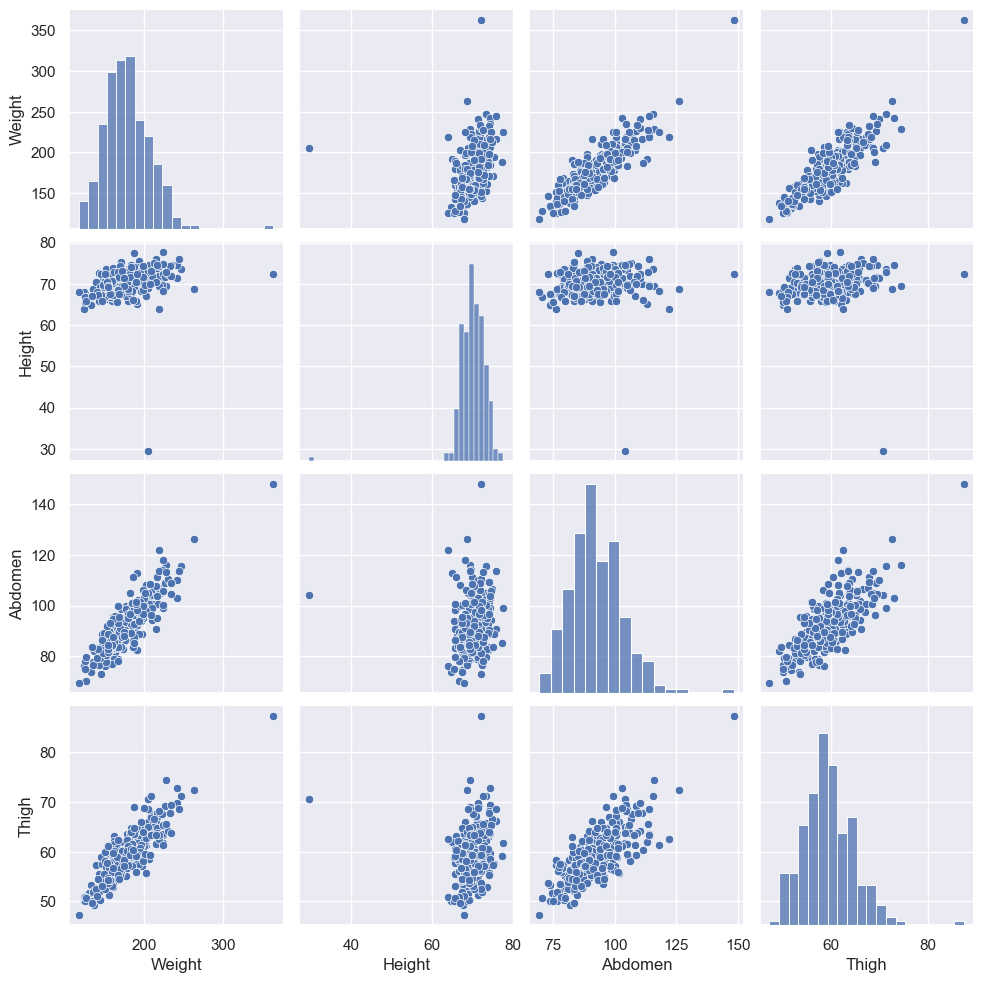

In [7]:
sns.pairplot(df[['Weight', 'Height', 'Abdomen', 'Thigh']])
plt.show()

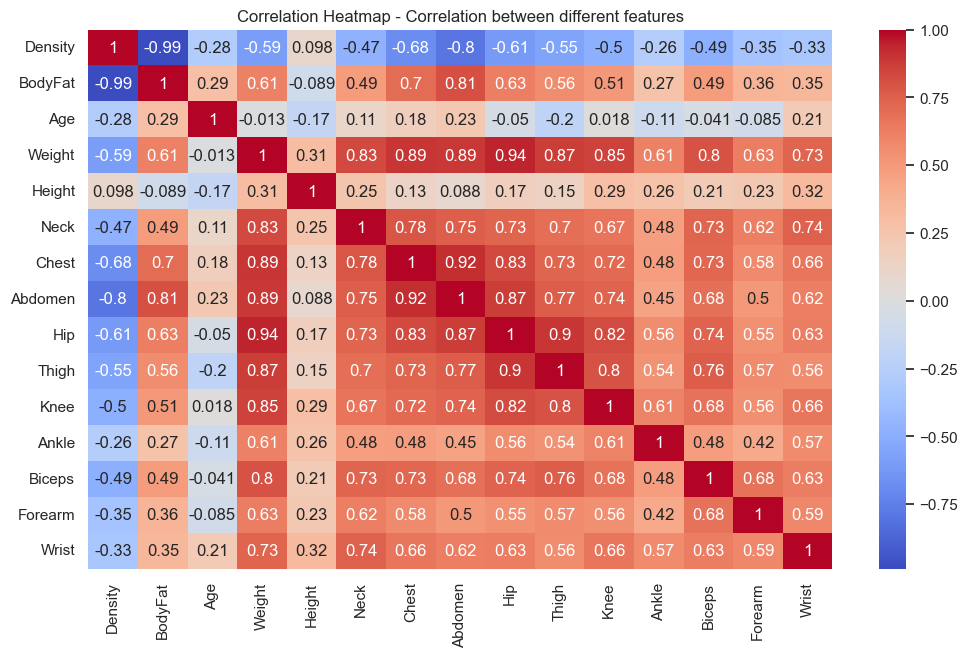

In [8]:
# Correlation heatmap

corr_matrix = df.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Correlation between different features')
plt.show()

#### BodyFat is highly correlated to Density, Chest circumference, Abdomen circumference & Weight, Hips circumference and Thighs circumference to some extent 

## Splitting the dataset (80/20 split)

In [9]:
y = df['BodyFat']
X = df.drop('BodyFat', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

#### Standardzing the data

In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test) 

## Deep Learning Model

#### Making a sequential model with 3 hidden layers and 1 output layer

In [11]:
model = Sequential()

model.add(Dense(128, activation = 'relu', input_shape = (X_train_scaled.shape[1],)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
# model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))

#### Model Summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


#### Defining Learning Rate and Compiling the Model with Adam optimizer

In [13]:
learning_rate = 0.1
model.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = learning_rate),
              loss='mse',
              metrics=tf.keras.metrics.RootMeanSquaredError())

#### Running the model for 100 epochs and fitting it onto our data

In [14]:
epochs = 100
batch_size = 10
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size = batch_size, validation_split = 0.1)

Epoch 1/100
18/18 [==============================] - 3s 29ms/step - loss: 769.8220 - root_mean_squared_error: 27.7457 - val_loss: 154.3373 - val_root_mean_squared_error: 12.4233
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 140.5295 - root_mean_squared_error: 11.8545 - val_loss: 108.2511 - val_root_mean_squared_error: 10.4044
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 76.2763 - root_mean_squared_error: 8.7336 - val_loss: 80.4434 - val_root_mean_squared_error: 8.9690
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 68.1311 - root_mean_squared_error: 8.2542 - val_loss: 84.9875 - val_root_mean_squared_error: 9.2189
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 73.8319 - root_mean_squared_error: 8.5926 - val_loss: 85.8282 - val_root_mean_squared_error: 9.2644
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 66.1811 - root_mean_squared_error: 8.1352 - val_loss:

18/18 [==============================] - 0s 4ms/step - loss: 65.0161 - root_mean_squared_error: 8.0633 - val_loss: 66.5438 - val_root_mean_squared_error: 8.1574
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 65.3435 - root_mean_squared_error: 8.0835 - val_loss: 89.4484 - val_root_mean_squared_error: 9.4577
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 65.8041 - root_mean_squared_error: 8.1120 - val_loss: 64.5244 - val_root_mean_squared_error: 8.0327
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 68.3557 - root_mean_squared_error: 8.2678 - val_loss: 65.6973 - val_root_mean_squared_error: 8.1054
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 66.0010 - root_mean_squared_error: 8.1241 - val_loss: 68.1755 - val_root_mean_squared_error: 8.2568
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 66.0036 - root_mean_squared_error: 8.1243 - val_loss: 85.8494 - val_r

18/18 [==============================] - 0s 5ms/step - loss: 50.9273 - root_mean_squared_error: 7.1363 - val_loss: 88.4828 - val_root_mean_squared_error: 9.4065
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 50.9735 - root_mean_squared_error: 7.1396 - val_loss: 89.4602 - val_root_mean_squared_error: 9.4583
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 51.0769 - root_mean_squared_error: 7.1468 - val_loss: 90.1015 - val_root_mean_squared_error: 9.4922
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 51.1065 - root_mean_squared_error: 7.1489 - val_loss: 87.6865 - val_root_mean_squared_error: 9.3641
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 50.9283 - root_mean_squared_error: 7.1364 - val_loss: 89.4565 - val_root_mean_squared_error: 9.4581
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 51.0517 - root_mean_squared_error: 7.1450 - val_loss: 90.5158 - val_

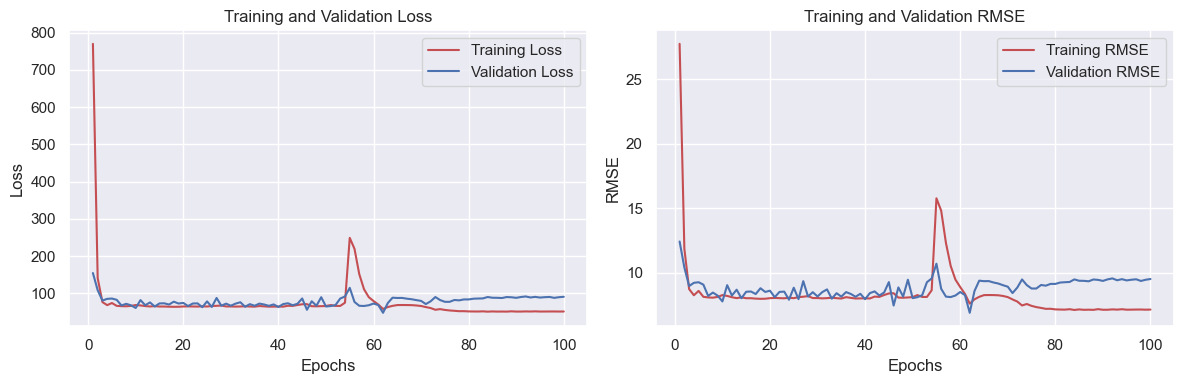

In [16]:
import matplotlib.pyplot as plt

# Extract the training and validation loss and root mean squared error from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

# Create a range of epoch numbers for the x-axis
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation RMSE
plt.subplot(1, 2, 2)
plt.plot(epochs, train_rmse, 'r', label='Training RMSE')
plt.plot(epochs, val_rmse, 'b', label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, batch_size=batch_size)
print("RMSE:", loss)

6/6 [==============================] - 0s 3ms/step - loss: 52.8399 - root_mean_squared_error: 7.2691
RMSE: 52.83989715576172
